# Binary Particle Swarm Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function to create the swarm

In [2]:
def create_swarm(ub, lb, nVar, noP):
  # ub -> vector of upper bounds for each variable
  # lb -> vector of lower bounds for each variable
  # nVar -> number of variables
  # noP -> number of particles
  return {
    'particles': [
      {
        'X' : np.round((ub - lb) * np.random.rand(nVar) + lb),
        'V' : np.zeros(nVar),
        'pbest' : {
          'X' : np.zeros(nVar),
          'O' : np.inf
        }
      } for i in range(noP)],
    'gbest' : {
      'X' : np.zeros(nVar),
      'O' : np.inf
    }
  }

## Function to run the iterations

In [3]:
def run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective):

  gbests = []

  for t in range(maxIter):

    # for current positions, updating objective, pbest and gbest values
    for k in range(noP):
      currentX = swarm['particles'][k]['X']
      currO = objective(currentX)
  
      if currO < swarm['particles'][k]['pbest']['O']:
        swarm['particles'][k]['pbest']['X'] = currentX
        swarm['particles'][k]['pbest']['O'] = currO

      if currO < swarm['gbest']['O']:
        swarm['gbest']['X'] = currentX.copy()
        swarm['gbest']['O'] = currO.copy()

    # updating the weight
    w = wMax - (t+1) * ((wMax - wMin)/maxIter)

    # updating position and velocity vectors for each particle
    for k in range(noP):
      swarm['particles'][k]['V'] = w * swarm['particles'][k]['V'] \
                  + c1 * np.random.rand(nVar) * (swarm['particles'][k]['pbest']['X'] - swarm['particles'][k]['X']) \
                  + c2 * np.random.rand(nVar) * (swarm['gbest']['X'] - swarm['particles'][k]['X'])

      # limiting the velocity
      swarm['particles'][k]['V'] = np.minimum(swarm['particles'][k]['V'], vMax)
      swarm['particles'][k]['V'] = np.maximum(swarm['particles'][k]['V'], vMin)

      sigm = 1/(1 + np.exp(-swarm['particles'][k]['V']))

      # updating each dimension of the kth particle
      for d in range(nVar):
        r = np.random.rand(1)
        if r < sigm[d]:
          swarm['particles'][k]['X'][d] = 1
        else:
          swarm['particles'][k]['X'][d] = 0
    
    # print(swarm['gbest'])
    gbests.append(swarm['gbest']['O'])

  print('Optimum value : ', swarm['gbest']['O'])
  print('Optimum position : ', swarm['gbest']['X'])
  return gbests

## Function to plot the graph of GBEST vs iterations

In [4]:
def make_plot(gbests):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.set_yscale('log')
  ax.set_ylabel('Value of GBEST')
  ax.set_xlabel('Iteration #')
  ax.plot(gbests)

## Top level function

In [5]:
def particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin):
  swarm = create_swarm(ub, lb, nVar, noP)
  gbests = run_iterations(swarm, maxIter, noP, lb, ub, nVar, vMax, vMin, c1, c2, wMax, wMin, objective)
  # print(gbests)
  make_plot(gbests)

## BPSO

Optimum value :  28.0
Optimum position :  [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0.]


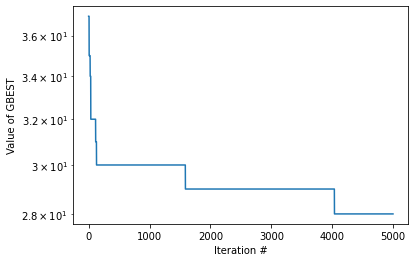

In [7]:
# defining the parameters of the problem
nVar = 10
ub = np.ones(nVar)
lb = np.zeros(nVar)
vMax = (ub - lb) * 0.2
vMin = -vMax

def objective(x):
  return np.sum(np.square(x)) 

# defining the parameters of Particle Swarm Optimization
noP = 50
maxIter = 500
wMax = 0.9
wMin = 0.2
c1 = 2
c2 = 2

particle_swarm_optimization(nVar, ub, lb, objective, noP, maxIter, wMax, wMin, c1, c2, vMax, vMin)